## MetENP

MetENP is a R package that enables detection of significant metabolites from metabolite information 
(names or names and concentration along with metadata information) and provides

1. Enrichment score of metabolite class,
2. Maps to pathway of the species of choice,
3. Calculate enrichment score of pathways,
4. Plots the pathways and shows the metabolite increase or decrease
5. Gets gene info, reaction info, enzyme info

For more info, check out the vignette.

In [1]:
if (!requireNamespace("KEGGREST", quietly = TRUE))
    BiocManager::install("KEGGREST", update = TRUE, ask = FALSE)

if (!requireNamespace("KEGGgraph", quietly = TRUE))
    BiocManager::install("KEGGgraph", update = TRUE, ask = FALSE)

if (!requireNamespace("pathview", quietly = TRUE))
    BiocManager::install("pathview", update = TRUE, ask = FALSE)

#if (!requireNamespace("KEGG.db", quietly = TRUE))
#    BiocManager::install("KEGG.db", update = TRUE, ask = FALSE)

#if (!requireNamespace("MetENP", quietly = TRUE))
#    devtools::install("..", upgrade = "never")



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



In [2]:
USER_HOME=Sys.getenv("HOME");
.libPaths( c( .libPaths(), paste0(USER_HOME, "/.local/R") ))
#.libPaths( c( .libPaths(), paste0("../../R") )); # suitable path to where MetENP R package is installed

library(MetENP)

#### If you do not wish to install, alternatively, download from github(https://github.com/metabolomicsworkbench/MetENP) and load libraries and functions

In [3]:
data = getmwstudies('ST000084', 'data')
head(data)

analysis_id,analysis_summary,metabolite_name,metabolite_id,refmet_name,SBEP_Metab_Control1,SBEP_Metab_Control2,SBEP_Metab_Control3,SBEP_Metab_LPSactivated1,SBEP_Metab_LPSactivated2,SBEP_Metab_LPSactivated3
<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AN000136,GCMS positive ion mode,1-methyl nicotinamide,ME056499,1-Methyl nicotinamide,1239983.871,1254663.088,1489471.315,1062991.62,919285.1031,1110010.624
AN000136,GCMS positive ion mode,2-aminoethanethiol,ME056500,Cysteamine,1978223.421,1627360.314,1706353.61,860066,824243,1110568.372
AN000136,GCMS positive ion mode,3-hydroxybenzaldehyde,ME056560,3-Hydroxybenzaldehyde,NA,NA,NA,NA,440476.8001,450894.3104
AN000136,GCMS positive ion mode,3-phosphoglyceric acid,ME056501,3-Phosphoglyceric acid,939105.598,1126254.388,1209267.302,1378750.809,1600810.737,1659251.931
AN000136,GCMS positive ion mode,4-guanidinobutyric acid,ME056502,4-Guanidinobutanoic acid,2503735.814,2524316.133,3831232.635,1691148.95,1629745.89,1948152.502
AN000136,GCMS positive ion mode,4-hydroxyquinoline-2-carboxylic acid,ME056503,Kynurenic acid,2242776.722,2044760.803,2387892.728,170138.6278,162000.6772,200927.2684


In [4]:
metadata = getmwstudies('ST000084', 'factors')
head(metadata)

,study_id,local_sample_id,subject_type,factors,Lipopolysaccharide Treatment
,<named list>,<named list>,<named list>,<named list>,<chr>
1,ST000084,SBEP_Metab_LPSactivated1,Animal cells,Lipopolysaccharide Treatment:100 ng/ml,100 ng/ml
2,ST000084,SBEP_Metab_LPSactivated2,Animal cells,Lipopolysaccharide Treatment:100 ng/ml,100 ng/ml
3,ST000084,SBEP_Metab_LPSactivated3,Animal cells,Lipopolysaccharide Treatment:100 ng/ml,100 ng/ml
4,ST000084,SBEP_Metab_Control1,Animal cells,Lipopolysaccharide Treatment:None,None
5,ST000084,SBEP_Metab_Control2,Animal cells,Lipopolysaccharide Treatment:None,None
6,ST000084,SBEP_Metab_Control3,Animal cells,Lipopolysaccharide Treatment:None,None


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.


### Associate metabolomics data to the refmet class


In [5]:

refmet_class= convert_refmet(data)
head(refmet_class)

,metabolite_name,analysis_id,analysis_summary,metabolite_id,refmet_name,SBEP_Metab_Control1,SBEP_Metab_Control2,SBEP_Metab_Control3,SBEP_Metab_LPSactivated1,SBEP_Metab_LPSactivated2,SBEP_Metab_LPSactivated3,formula,super_class,main_class,sub_class
,<chr>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1-methyl nicotinamide,AN000136,GCMS positive ion mode,ME056499,1-Methyl nicotinamide,1239983.871,1254663.088,1489471.315,1062991.62,919285.1031,1110010.624,C7H9N2O,Organoheterocyclic compounds,Pyridinecarboxylic acids,Nicotinamides
2,2-aminoethanethiol,AN000136,GCMS positive ion mode,ME056500,Cysteamine,1978223.421,1627360.314,1706353.61,860066,824243,1110568.372,C2H7NS,Organosulfur compounds,Thiols,Alkylthiols
3,3-hydroxybenzaldehyde,AN000136,GCMS positive ion mode,ME056560,3-Hydroxybenzaldehyde,NA,NA,NA,NA,440476.8001,450894.3104,C7H6O2,Organic oxygen compounds,Benzaldehydes,Hydroxybenzaldehydes
4,3-phosphoglyceric acid,AN000136,GCMS positive ion mode,ME056501,3-Phosphoglyceric acid,939105.598,1126254.388,1209267.302,1378750.809,1600810.737,1659251.931,C3H7O7P,Organic acids,Short-chain acids,Short-chain acids
5,4-guanidinobutyric acid,AN000136,GCMS positive ion mode,ME056502,4-Guanidinobutanoic acid,2503735.814,2524316.133,3831232.635,1691148.95,1629745.89,1948152.502,C5H11N3O2,Organic acids,Amino acids and peptides,Amino acids
6,4-hydroxyquinoline-2-carboxylic acid,AN000136,GCMS positive ion mode,ME056503,Kynurenic acid,2242776.722,2044760.803,2387892.728,170138.6278,162000.6772,200927.2684,C10H7NO3,Organoheterocyclic compounds,Quinolines,Quinoline carboxylic acids


In [6]:
unique(metadata$factors)


[[1]]
[1] "Lipopolysaccharide Treatment:100 ng/ml"

[[2]]
[1] "Lipopolysaccharide Treatment:None"

In [8]:
### Find the analysis mode
unique(data$analysis_summary)

[[1]]
[1] "GCMS positive ion mode"

### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section
There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group. 

In [9]:
stats_metabolites = significant_met(metabolomics_data=refmet_class, met_col="metabolite_name",analysis_type=c('GCMS positive ion mode'), metadata=metadata, factor1='100 ng/ml', factor2=c('None'), factor_col='Lipopolysaccharide Treatment',sample_col='local_sample_id', p_adjust='fdr',normalization="50percent")

sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= 0.05&abs(stats_metabolites[,"log2Fold_change"])>0.5),]


Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


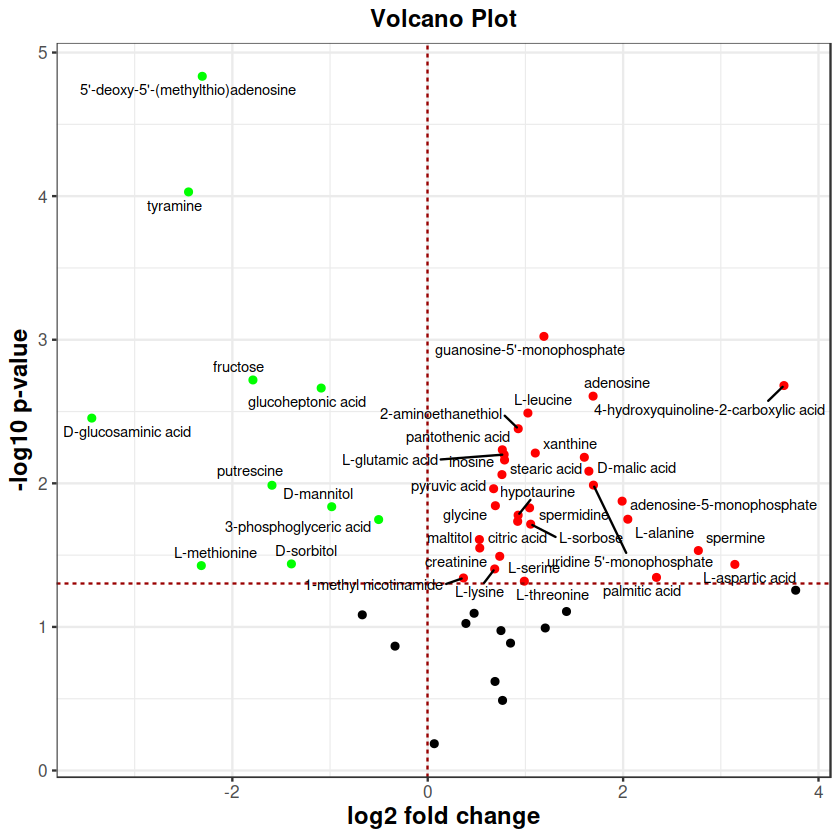

In [10]:
plot_volcano(stats_metabolites, thres_pval= 0.05,thres_log2foldchange = 0.0, TRUE)

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [11]:

sig_metabolites_kegg_id= map_keggid(sig_metabolites)

#### Check all your significant metabolites have not been assigned metabolite class

In [12]:
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)

character(0)

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [13]:
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass='sub_class', plotting=TRUE, thres_logfC = 0.0)


Warning message:
“Use of `count_changes[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”


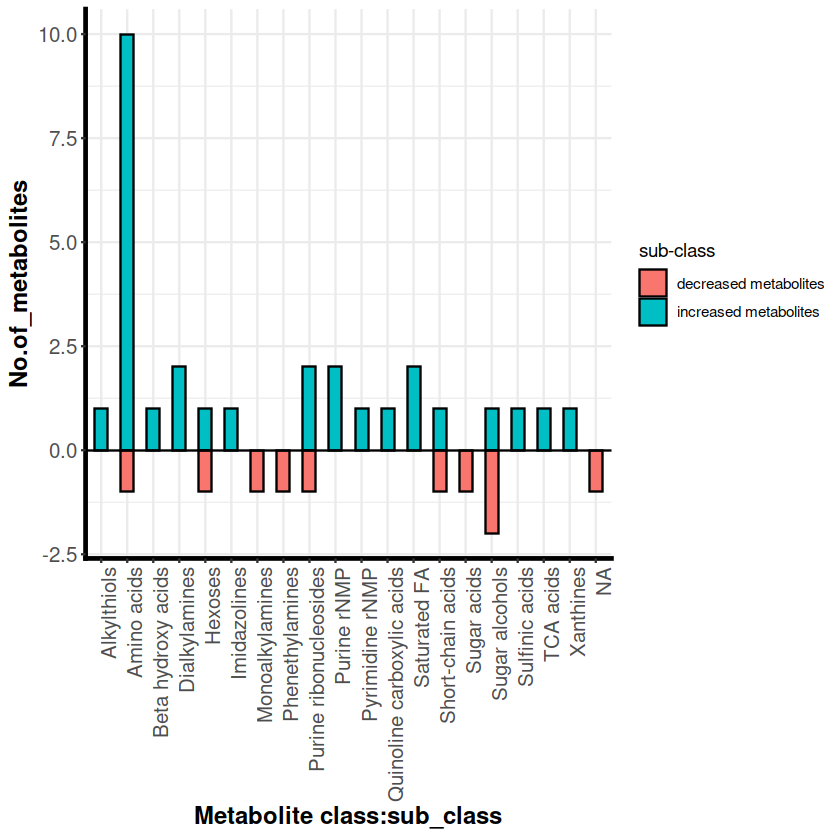

In [14]:
count_changes$plotimg

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [15]:
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass="sub_class",enrich_stats="HG",no=1)

#### Plot the enrichment score via function plot_met_enrichment

Warning message:
“Use of `metclass_stats[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”


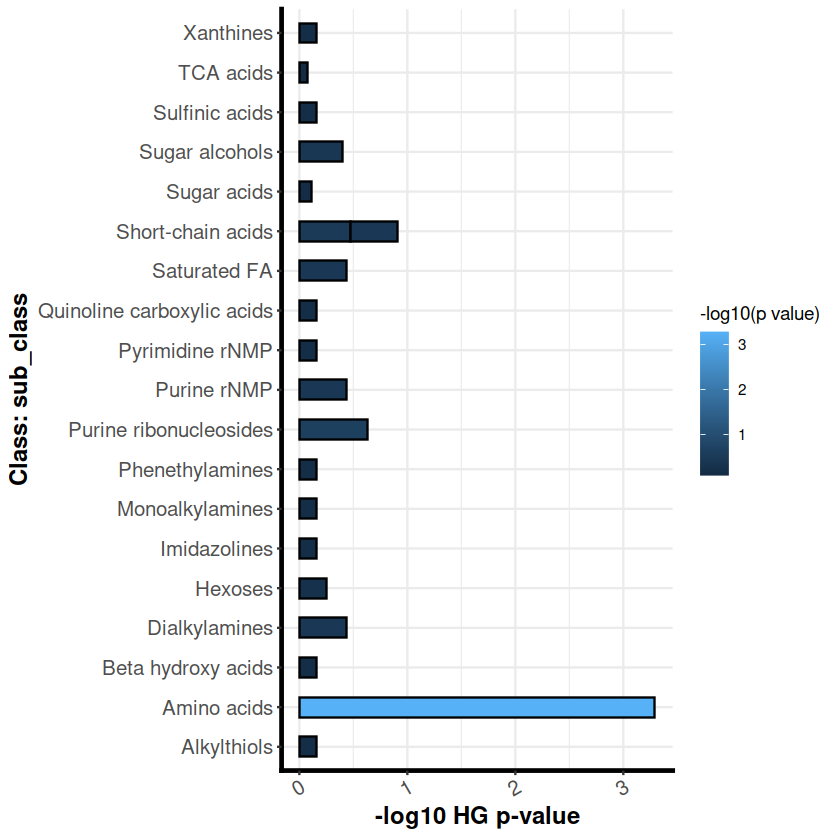

In [16]:
plot_met_enrichment(metenrichment, "sub_class","HG", no=1)

### Check the pathways with reactions of all the significant metabolites

In [17]:
met_path = met_pathways(df_metenrichment = metenrichment, 'hsa')
head(met_path)

[1] "query_split val"
NULL
[1] "----colnames of dd---"
[1] "ENTRY"      "NAME"       "PATHWAY"    "RCLASS"     "ORTHOLOGY" 
[6] "DEFINITION" "EQUATION"   "ENZYME"    
[1] "-----"
[1] "colnames of df"
[1] "ENTRY"      "NAME"       "PATHWAY"    "RCLASS"     "ORTHOLOGY" 
[6] "DEFINITION" "EQUATION"   "ENZYME"    
[1] "======"
[1] "After renaming columns"
[1] "ENTRY"         "NAME"          "PATHWAY"       "RCLASS"       
[5] "ORTHOLOGY"     "EQUATION_more" "EQUATION"      "ENZYME"       


,rxn,refmet_name,Exact mass,KEGG ID,Metabolite,100 ng/ml_mean,None_mean,Fold_change,log2Fold_change,t_value,⋯,metabolite_id,super_class,main_class,sub_class,formula,HG p-value,Rxn_name,PATHWAY,pathway_id,sps_path_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<named list>,<chr>,<chr>,<chr>,<chr>,<dbl>,<named list>,<chr>,<chr>,<chr>
1,R00008,Pyruvic acid,88.0160,C00022,pyruvic acid,832822.7,1329176.8,1.595990,0.6744517,-4.517032,⋯,ME056540,Organic acids,Short-chain acids,Short-chain acids,C3H4O3,0.3671067738,4-hydroxy-4-methyl-2-oxoglutarate pyruvate-lyase (pyruvate-forming),Metabolic pathways,rn01100,hsa01100
2,R00014,Pyruvic acid,88.0160,C00022,pyruvic acid,832822.7,1329176.8,1.595990,0.6744517,-4.517032,⋯,ME056540,Organic acids,Short-chain acids,Short-chain acids,C3H4O3,0.3671067738,pyruvate:thiamin diphosphate acetaldehydetransferase (decarboxylating),Glycolysis / Gluconeogenesis,rn00010,hsa00010
3,R00014,Pyruvic acid,88.0160,C00022,pyruvic acid,832822.7,1329176.8,1.595990,0.6744517,-4.517032,⋯,ME056540,Organic acids,Short-chain acids,Short-chain acids,C3H4O3,0.3671067738,pyruvate:thiamin diphosphate acetaldehydetransferase (decarboxylating),Citrate cycle (TCA cycle),rn00020,hsa00020
4,R00014,Pyruvic acid,88.0160,C00022,pyruvic acid,832822.7,1329176.8,1.595990,0.6744517,-4.517032,⋯,ME056540,Organic acids,Short-chain acids,Short-chain acids,C3H4O3,0.3671067738,pyruvate:thiamin diphosphate acetaldehydetransferase (decarboxylating),Pyruvate metabolism,rn00620,hsa00620
5,R00021,Glutamic acid,147.0532,C00025,L-glutamic acid,19334273,33246732,1.719575,0.7820520,-5.288951,⋯,ME056491,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,0.0005100148,L-glutamate:ferredoxin oxidoreductase (transaminating),Glyoxylate and dicarboxylate metabolism,rn00630,hsa00630
6,R00021,Glutamic acid,147.0532,C00025,L-glutamic acid,19334273,33246732,1.719575,0.7820520,-5.288951,⋯,ME056491,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,0.0005100148,L-glutamate:ferredoxin oxidoreductase (transaminating),Nitrogen metabolism,rn00910,hsa00910


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [18]:
setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

[1] "glucoheptonic acid" "maltitol"

### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [19]:
load('../data/ls_path.RData')
load('../data/korg.RData')
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='hsa',padj='BH', kegg_comp_path=FALSE)

Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”


In [20]:
head(kegg_es)

,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
,<fct>,<int>,<int>,<dbl>,<dbl>
1,"Alanine, aspartate and glutamate metabolism",7,28,0.9999995,1
2,alpha-Linolenic acid metabolism,1,44,1.0000000,1
3,Amino sugar and nucleotide sugar metabolism,2,118,NaN,NaN
4,Aminoacyl-tRNA biosynthesis,10,52,1.0000000,1
5,Arachidonic acid metabolism,4,75,NaN,NaN
6,Arginine and proline metabolism,9,72,NaN,NaN


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

Warning message:
“ggrepel: 93 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


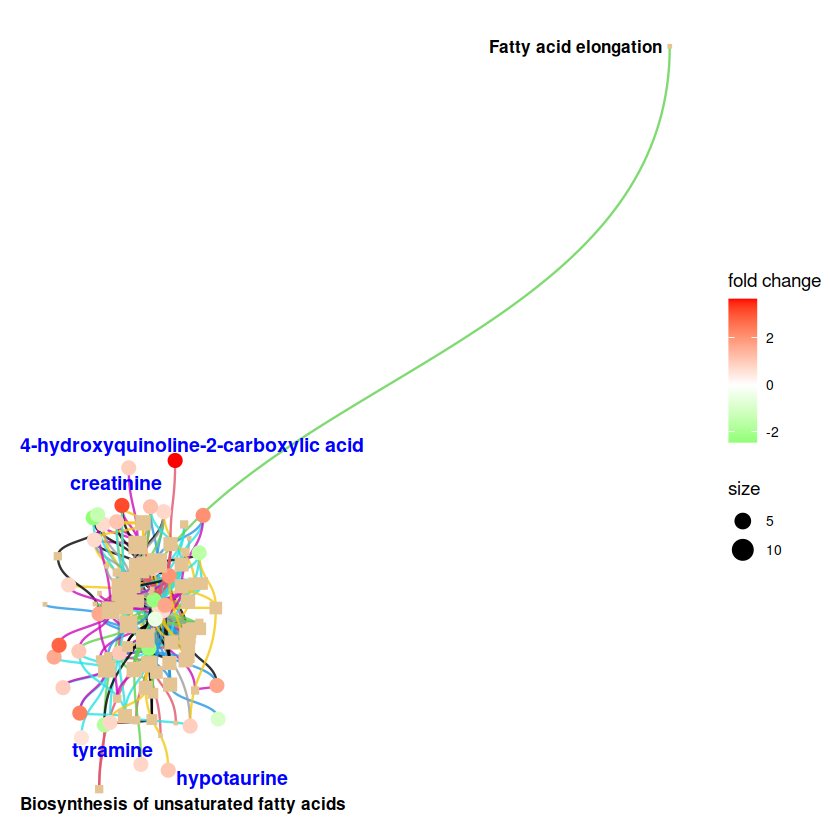

In [21]:
plot_pathway_networks (met_path,kegg_es, TRUE)

### Heatmap

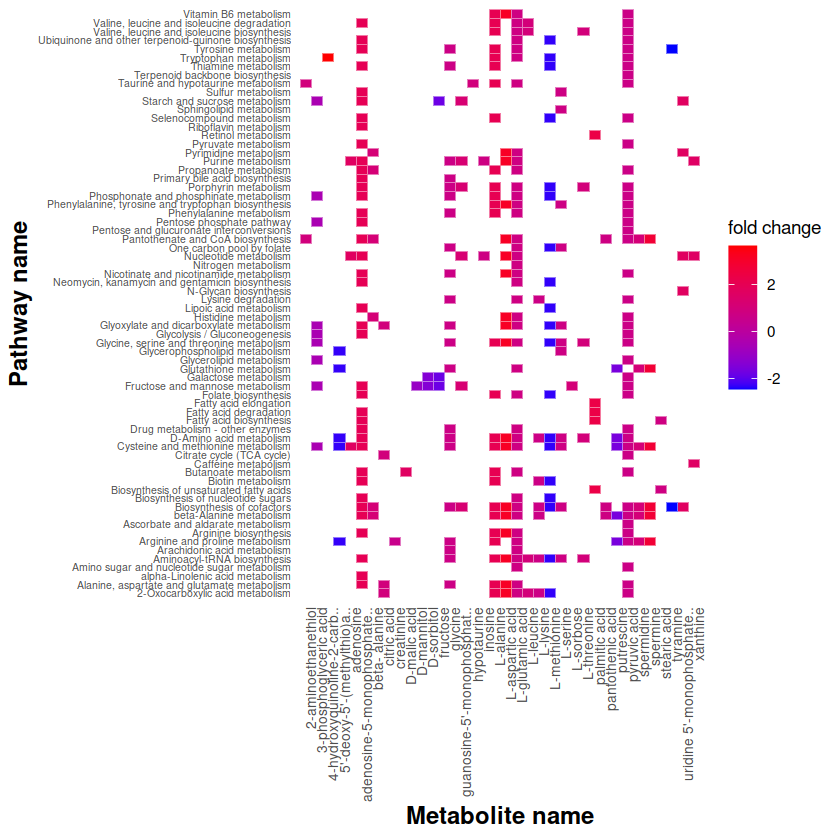

In [22]:
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=8, yaxis=6)

### Dotplot

Warning message:
“Use of `significant_pathways[["pathway_HG p-value"]]` is discouraged. Use `.data[["pathway_HG p-value"]]` instead.”


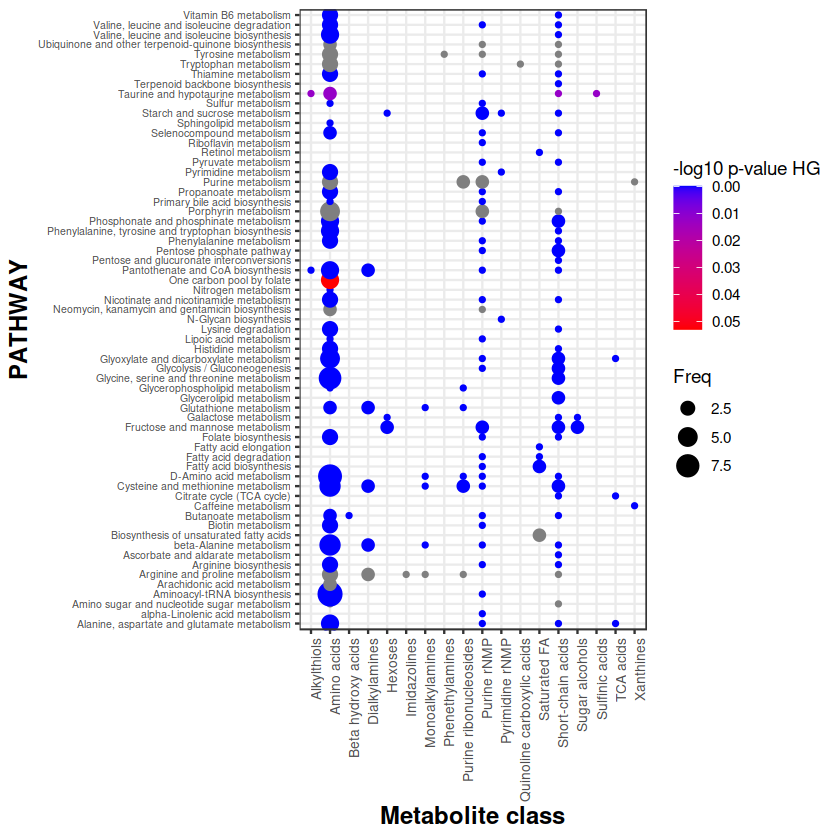

In [23]:

dotplot_met_class_path (met_path, kegg_es,"sub_class",xaxis=8,yaxis=6)

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [24]:
met_gene_info = enzyme_gene_info (metenrichment, "hsa","sub_class")
head(met_gene_info)

[1] "query_split val"
NULL
[1] "----colnames of dd---"
[1] "ENTRY"      "NAME"       "PATHWAY"    "RCLASS"     "ORTHOLOGY" 
[6] "DEFINITION" "EQUATION"   "ENZYME"    
[1] "-----"
[1] "colnames of df"
[1] "ENTRY"      "NAME"       "PATHWAY"    "RCLASS"     "ORTHOLOGY" 
[6] "DEFINITION" "EQUATION"   "ENZYME"    
[1] "======"
[1] "After renaming columns"
[1] "ENTRY"         "NAME"          "PATHWAY"       "RCLASS"       
[5] "ORTHOLOGY"     "EQUATION_more" "EQUATION"      "ENZYME"       


,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>
1,K00008,L-iditol 2-dehydrogenase [EC:1.1.1.14],6652,(RefSeq) sorbitol dehydrogenase,Homo sapiens (human),"Pentose and glucuronate interconversions, Fructose and mannose metabolism , Metabolic pathways","NCBI-GeneID: 6652 , NCBI-ProteinID: NP_003095, OMIM: 182500 , HGNC: 11184 , Ensembl: ENSG00000140263 , Vega: OTTHUMG00000131265 , Pharos: Q00796(Tchem) , UniProt: Q00796",Pfam: ADH_N ADH_zinc_N Glu_dehyd_C AlaDh_PNT_C Pyr_redox_2 DUF2921 ADH_zinc_N_2 Methyltransf_25 2-Hacid_dh_C,R00875,D-sorbitol,C00794,Sugar alcohols,D-Glucitol:NAD+ 2-oxidoreductase,"RC00001 C00003_C00004, RC00085 C00095_C00794",C00794 + C00003 <=> C00095 + C00004 + C00080,D-Sorbitol + NAD+ <=> D-Fructose + NADH + H+,"1.1.1.14, 1.1.1.15"
2,K00008,L-iditol 2-dehydrogenase [EC:1.1.1.14],6652,(RefSeq) sorbitol dehydrogenase,Homo sapiens (human),"Pentose and glucuronate interconversions, Fructose and mannose metabolism , Metabolic pathways","NCBI-GeneID: 6652 , NCBI-ProteinID: NP_003095, OMIM: 182500 , HGNC: 11184 , Ensembl: ENSG00000140263 , Vega: OTTHUMG00000131265 , Pharos: Q00796(Tchem) , UniProt: Q00796",Pfam: ADH_N ADH_zinc_N Glu_dehyd_C AlaDh_PNT_C Pyr_redox_2 DUF2921 ADH_zinc_N_2 Methyltransf_25 2-Hacid_dh_C,R00875,fructose,C00095,Hexoses,D-Glucitol:NAD+ 2-oxidoreductase,"RC00001 C00003_C00004, RC00085 C00095_C00794",C00794 + C00003 <=> C00095 + C00004 + C00080,D-Sorbitol + NAD+ <=> D-Fructose + NADH + H+,"1.1.1.14, 1.1.1.15"
3,K00011,aldehyde reductase [EC:1.1.1.21],231,(RefSeq) aldo-keto reductase family 1 member B,Homo sapiens (human),"Pentose and glucuronate interconversions, Fructose and mannose metabolism , Galactose metabolism , Glycerolipid metabolism , Folate biosynthesis , Metabolic pathways","NCBI-GeneID: 231 , NCBI-ProteinID: NP_001619 , OMIM: 103880 , HGNC: 381 , Ensembl: ENSG00000085662 , Vega: OTTHUMG00000155322 , Pharos: P15121(Tclin) , UniProt: P15121 A0A024R7A8",Pfam: Aldo_ket_red,R01787,D-sorbitol,C00794,Sugar alcohols,D-Glucitol:NADP+ 1-oxidoreductase,"RC00001 C00005_C00006, RC00108 C00267_C00794",C00794 + C00006 <=> C00267 + C00005 + C00080,D-Sorbitol + NADP+ <=> alpha-D-Glucose + NADPH + H+,1.1.1.21
4,K00011,aldehyde reductase [EC:1.1.1.21],57016,(RefSeq) aldo-keto reductase family 1 member B10,Homo sapiens (human),"Pentose and glucuronate interconversions, Fructose and mannose metabolism , Galactose metabolism , Glycerolipid metabolism , Folate biosynthesis , Metabolic pathways","NCBI-GeneID: 57016 , NCBI-ProteinID: NP_064695, OMIM: 604707 , HGNC: 382 , Ensembl: ENSG00000198074 , Vega: OTTHUMG00000155356 , Pharos: O60218(Tchem) , UniProt: O60218",Pfam: Aldo_ket_red HU-CCDC81_euk_1,R01787,D-sorbitol,C00794,Sugar alcohols,D-Glucitol:NADP+ 1-oxidoreductase,"RC00001 C00005_C00006, RC00108 C00267_C00794",C00794 + C00006 <=> C00267 + C00005 + C00080,D-Sorbitol + NADP+ <=> alpha-D-Glucose + NADPH + H+,1.1.1.21
5,K00016,L-lactate dehydrogenase [EC:1.1.1.27],160287,(RefSeq) lactate dehydrogenase A like 6A,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Cysteine and methionine metabolism , Pyruvate metabolism , Propanoate metabolism , Metabolic pathways , HIF-1 signaling pathway , Glucagon signaling pathway , Central carbon metabolism in cancer","NCBI-GeneID: 160287 , NCBI-ProteinID: NP_001137543, OMIM: 618928 , HGNC: 28335 , Ensembl: ENSG00000166800 , Vega: OTTHUMG00000167724 , Pharos: Q6ZMR3(Tbio) , UniProt: Q6ZMR3",Pfam: Ldh_1_N Ldh_1_C Glyco_hydro_4 UDPG_MGDP_dh_N Disaggr_assoc ThiF DUF6154 Mig-14,R00703,pyruvic acid,C00022,Short-chain acids,(S)-Lactate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00044 C00022_C00186",C00186 + C00003 <=> C00022 + C00004 + C00080,(S)-Lactate + NAD+ <=> Pyruvate + NADH + H+,1

#### Get the information if metabolite is a reactant or substrate

In [25]:
rclass_info = react_substrate(met_gene_info)
head(rclass_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME,reactant_product
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,K00008,L-iditol 2-dehydrogenase [EC:1.1.1.14],6652,(RefSeq) sorbitol dehydrogenase,Homo sapiens (human),"Pentose and glucuronate interconversions, Fructose and mannose metabolism , Metabolic pathways","NCBI-GeneID: 6652 , NCBI-ProteinID: NP_003095, OMIM: 182500 , HGNC: 11184 , Ensembl: ENSG00000140263 , Vega: OTTHUMG00000131265 , Pharos: Q00796(Tchem) , UniProt: Q00796",Pfam: ADH_N ADH_zinc_N Glu_dehyd_C AlaDh_PNT_C Pyr_redox_2 DUF2921 ADH_zinc_N_2 Methyltransf_25 2-Hacid_dh_C,R00875,D-sorbitol,C00794,Sugar alcohols,D-Glucitol:NAD+ 2-oxidoreductase,"RC00001 C00003_C00004, RC00085 C00095_C00794",C00794 + C00003 <=> C00095 + C00004 + C00080,D-Sorbitol + NAD+ <=> D-Fructose + NADH + H+,"1.1.1.14, 1.1.1.15",Substrate
2,K00008,L-iditol 2-dehydrogenase [EC:1.1.1.14],6652,(RefSeq) sorbitol dehydrogenase,Homo sapiens (human),"Pentose and glucuronate interconversions, Fructose and mannose metabolism , Metabolic pathways","NCBI-GeneID: 6652 , NCBI-ProteinID: NP_003095, OMIM: 182500 , HGNC: 11184 , Ensembl: ENSG00000140263 , Vega: OTTHUMG00000131265 , Pharos: Q00796(Tchem) , UniProt: Q00796",Pfam: ADH_N ADH_zinc_N Glu_dehyd_C AlaDh_PNT_C Pyr_redox_2 DUF2921 ADH_zinc_N_2 Methyltransf_25 2-Hacid_dh_C,R00875,fructose,C00095,Hexoses,D-Glucitol:NAD+ 2-oxidoreductase,"RC00001 C00003_C00004, RC00085 C00095_C00794",C00794 + C00003 <=> C00095 + C00004 + C00080,D-Sorbitol + NAD+ <=> D-Fructose + NADH + H+,"1.1.1.14, 1.1.1.15",Product
3,K00011,aldehyde reductase [EC:1.1.1.21],231,(RefSeq) aldo-keto reductase family 1 member B,Homo sapiens (human),"Pentose and glucuronate interconversions, Fructose and mannose metabolism , Galactose metabolism , Glycerolipid metabolism , Folate biosynthesis , Metabolic pathways","NCBI-GeneID: 231 , NCBI-ProteinID: NP_001619 , OMIM: 103880 , HGNC: 381 , Ensembl: ENSG00000085662 , Vega: OTTHUMG00000155322 , Pharos: P15121(Tclin) , UniProt: P15121 A0A024R7A8",Pfam: Aldo_ket_red,R01787,D-sorbitol,C00794,Sugar alcohols,D-Glucitol:NADP+ 1-oxidoreductase,"RC00001 C00005_C00006, RC00108 C00267_C00794",C00794 + C00006 <=> C00267 + C00005 + C00080,D-Sorbitol + NADP+ <=> alpha-D-Glucose + NADPH + H+,1.1.1.21,Substrate
4,K00011,aldehyde reductase [EC:1.1.1.21],57016,(RefSeq) aldo-keto reductase family 1 member B10,Homo sapiens (human),"Pentose and glucuronate interconversions, Fructose and mannose metabolism , Galactose metabolism , Glycerolipid metabolism , Folate biosynthesis , Metabolic pathways","NCBI-GeneID: 57016 , NCBI-ProteinID: NP_064695, OMIM: 604707 , HGNC: 382 , Ensembl: ENSG00000198074 , Vega: OTTHUMG00000155356 , Pharos: O60218(Tchem) , UniProt: O60218",Pfam: Aldo_ket_red HU-CCDC81_euk_1,R01787,D-sorbitol,C00794,Sugar alcohols,D-Glucitol:NADP+ 1-oxidoreductase,"RC00001 C00005_C00006, RC00108 C00267_C00794",C00794 + C00006 <=> C00267 + C00005 + C00080,D-Sorbitol + NADP+ <=> alpha-D-Glucose + NADPH + H+,1.1.1.21,Substrate
5,K00016,L-lactate dehydrogenase [EC:1.1.1.27],160287,(RefSeq) lactate dehydrogenase A like 6A,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Cysteine and methionine metabolism , Pyruvate metabolism , Propanoate metabolism , Metabolic pathways , HIF-1 signaling pathway , Glucagon signaling pathway , Central carbon metabolism in cancer","NCBI-GeneID: 160287 , NCBI-ProteinID: NP_001137543, OMIM: 618928 , HGNC: 28335 , Ensembl: ENSG00000166800 , Vega: OTTHUMG00000167724 , Pharos: Q6ZMR3(Tbio) , UniProt: Q6ZMR3",Pfam: Ldh_1_N Ldh_1_C Glyco_hydro_4 UDPG_MGDP_dh_N Disaggr_assoc ThiF DUF6154 Mig-14,R00703,pyruvic acid,C00022,Short-chain acids,(S)-Lactate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00044 C00022_C00186",C00186 + C00003 <=> C00022 + 

#### Get gene info in short form

In [26]:
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']